# 확률적 경사 하강법

## SGDClassifier

In [1]:
import pandas as pd # 데이터 분석을 위한 패키지 불러오기 > pandas를 pd로 줄여서 사용

fish = pd.read_csv('https://bit.ly/fish_csv_data') # 데이터 불러오기 > fish 변수에 저장 > read_csv() 함수 사용 > 인터넷 상의 데이터 불러오기 > 'https://bit.ly/fish_csv_data'는 인터넷 상의 데이터 주소

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # 빙어 데이터에서 'Weight','Length','Diagonal','Height','Width' 열을 선택하여 fish_input 변수에 저장 > to_numpy() 함수를 사용하여 Numpy 배열로 변환
fish_target = fish['Species'].to_numpy() # 빙어 데이터에서 'Species' 열을 선택하여 fish_target 변수에 저장 > to_numpy() 함수를 사용하여 Numpy 배열로 변환

In [3]:
from sklearn.model_selection import train_test_split # train_test_split() 함수를 사용하기 위한 패키지 불러오기 > train_test_split() 함수는 훈련 세트와 테스트 세트로 나누어 주는 함수

train_input, test_input, train_target, test_target = train_test_split( # train_test_split() 함수를 사용하여 훈련 세트와 테스트 세트로 나누어 주기 > train_input, test_input, train_target, test_target 변수에 저장 
    fish_input, fish_target, random_state=42) # fish_input, fish_target을 훈련 세트와 테스트 세트로 나누어 주기 > random_state 매개변수를 42로 지정하여 훈련 세트와 테스트 세트를 나누기 전에 섞음

In [4]:
from sklearn.preprocessing import StandardScaler # StandardScaler 클래스를 사용하기 위한 패키지 불러오기 > StandardScaler 클래스는 특성을 표준화 전처리하는 클래스

ss = StandardScaler() # StandardScaler 클래스를 ss 변수에 저장
ss.fit(train_input) # ss 변수에 저장된 StandardScaler 클래스의 fit() 메서드를 사용하여 훈련 세트의 통계 값으로 표준화 전처리 수행 
train_scaled = ss.transform(train_input) # ss 변수에 저장된 StandardScaler 클래스의 transform() 메서드를 사용하여 훈련 세트를 표준화 전처리 수행 > train_scaled 변수에 저장 
test_scaled = ss.transform(test_input) # ss 변수에 저장된 StandardScaler 클래스의 transform() 메서드를 사용하여 테스트 세트를 표준화 전처리 수행 > test_scaled 변수에 저장

In [5]:
from sklearn.linear_model import SGDClassifier # SGDClassifier 클래스를 사용하기 위한 패키지 불러오기 > SGDClassifier 클래스는 확률적 경사 하강법을 사용하여 선형 분류 수행하는 클래스

In [6]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # SGDClassifier 클래스를 sc 변수에 저장 > loss 매개변수를 'log_loss'로 지정하여 로지스틱 손실 함수를 사용하여 확률적 경사 하강법을 사용하여 선형 분류 수행 > max_iter 매개변수를 10으로 지정하여 10번 반복하여 경사 하강법을 수행 > random_state 매개변수를 42로 지정하여 훈련 세트와 테스트 세트를 나누기 전에 섞음
sc.fit(train_scaled, train_target) # sc 변수에 저장된 SGDClassifier 클래스의 fit() 메서드를 사용하여 훈련 세트로 모델 훈련

print(sc.score(train_scaled, train_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 훈련 세트의 점수 출력
print(sc.score(test_scaled, test_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 테스트 세트의 점수 출력

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
sc.partial_fit(train_scaled, train_target) # sc 변수에 저장된 SGDClassifier 클래스의 partial_fit() 메서드를 사용하여 훈련 세트로 모델 훈련 > partial_fit() 메서드는 fit() 메서드와 달리 처음부터 끝까지 모두 훈련하지 않고 일부 데이터만 사용하여 훈련하는 메서드

print(sc.score(train_scaled, train_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 훈련 세트의 점수 출력
print(sc.score(test_scaled, test_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 테스트 세트의 점수 출력

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [8]:
import numpy as np # Numpy 패키지를 np로 줄여서 사용

sc = SGDClassifier(loss='log_loss', random_state=42) # SGDClassifier 클래스를 sc 변수에 저장 > loss 매개변수를 'log_loss'로 지정하여 로지스틱 손실 함수를 사용하여 확률적 경사 하강법을 사용하여 선형 분류 수행 > random_state 매개변수를 42로 지정하여 훈련 세트와 테스트 세트를 나누기 전에 섞음

train_score = [] # 훈련 세트의 점수를 저장할 빈 리스트 생성
test_score = [] # 테스트 세트의 점수를 저장할 빈 리스트 생성

classes = np.unique(train_target) # train_target 배열에서 고유한 값 추출하여 classes 변수에 저장

In [9]:
for _ in range(0, 300): # 300번 반복
    sc.partial_fit(train_scaled, train_target, classes=classes) # sc 변수에 저장된 SGDClassifier 클래스의 partial_fit() 메서드를 사용하여 훈련 세트로 모델 훈련 > partial_fit() 메서드는 fit() 메서드와 달리 처음부터 끝까지 모두 훈련하지 않고 일부 데이터만 사용하여 훈련하는 메서드 > classes 매개변수에 classes 변수에 저장된 고유한 값 전달
    
    train_score.append(sc.score(train_scaled, train_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 훈련 세트의 점수를 train_score 리스트에 추가
    test_score.append(sc.score(test_scaled, test_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 테스트 세트의 점수를 test_score 리스트에 추가

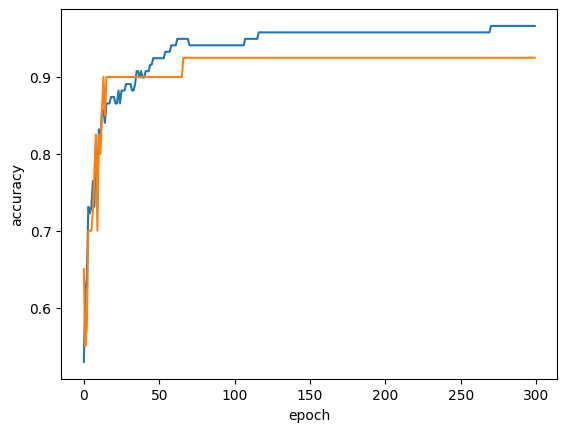

In [10]:
import matplotlib.pyplot as plt # Matplotlib 패키지의 pyplot 모듈을 plt로 줄여서 사용

plt.plot(train_score) # train_score 리스트를 선 그래프로 그리기
plt.plot(test_score) # test_score 리스트를 선 그래프로 그리기
plt.xlabel('epoch') # x축 레이블 지정 > epoch는 반복 횟수를 의미
plt.ylabel('accuracy') # y축 레이블 지정 > accuracy는 정확도를 의미
plt.show() # 그래프 출력

In [11]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # SGDClassifier 클래스를 sc 변수에 저장 > loss 매개변수를 'log_loss'로 지정하여 로지스틱 손실 함수를 사용하여 확률적 경사 하강법을 사용하여 선형 분류 수행 > max_iter 매개변수를 100으로 지정하여 100번 반복하여 경사 하강법을 수행 > tol 매개변수를 None으로 지정하여 훈련을 멈추는 기준을 지정하지 않음 > random_state 매개변수를 42로 지정하여 훈련 세트와 테스트 세트를 나누기 전에 섞음
sc.fit(train_scaled, train_target) # sc 변수에 저장된 SGDClassifier 클래스의 fit() 메서드를 사용하여 훈련 세트로 모델 훈련

print(sc.score(train_scaled, train_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 훈련 세트의 점수 출력
print(sc.score(test_scaled, test_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 테스트 세트의 점수 출력

0.957983193277311
0.925


In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # SGDClassifier 클래스를 sc 변수에 저장 > loss 매개변수를 'hinge'로 지정하여 힌지 손실 함수를 사용하여 확률적 경사 하강법을 사용하여 선형 분류 수행 > max_iter 매개변수를 100으로 지정하여 100번 반복하여 경사 하강법을 수행 > tol 매개변수를 None으로 지정하여 훈련을 멈추는 기준을 지정하지 않음 > random_state 매개변수를 42로 지정하여 훈련 세트와 테스트 세트를 나누기 전에 섞음
sc.fit(train_scaled, train_target) # sc 변수에 저장된 SGDClassifier 클래스의 fit() 메서드를 사용하여 훈련 세트로 모델 훈련

print(sc.score(train_scaled, train_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 훈련 세트의 점수 출력
print(sc.score(test_scaled, test_target)) # sc 변수에 저장된 SGDClassifier 클래스의 score() 메서드를 사용하여 테스트 세트의 점수 출력

0.9495798319327731
0.925
